In [3]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from random import random
import matplotlib
import sys

----------------------------------------------------
Test threshold with randomly renerated data
-

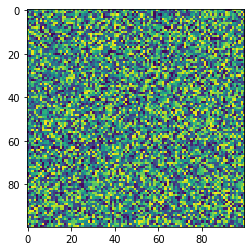

In [31]:
test_array = np.random.rand(100,100)
plt.imshow(test_array)

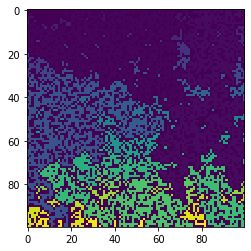

In [316]:
test_array = np.random.rand(100,100)
thresh = .4
in_1 = test_array > thresh
in_2 = test_array <= thresh
test_array[in_1] = 1
test_array[in_2] = 0
labeled_array, num_features = ndi.label(test_array)
plt.imshow(labeled_array)

----------------------------------------------------
Test threshold with observed data
-

2906
CPU times: user 787 ms, sys: 17 ms, total: 804 ms
Wall time: 816 ms


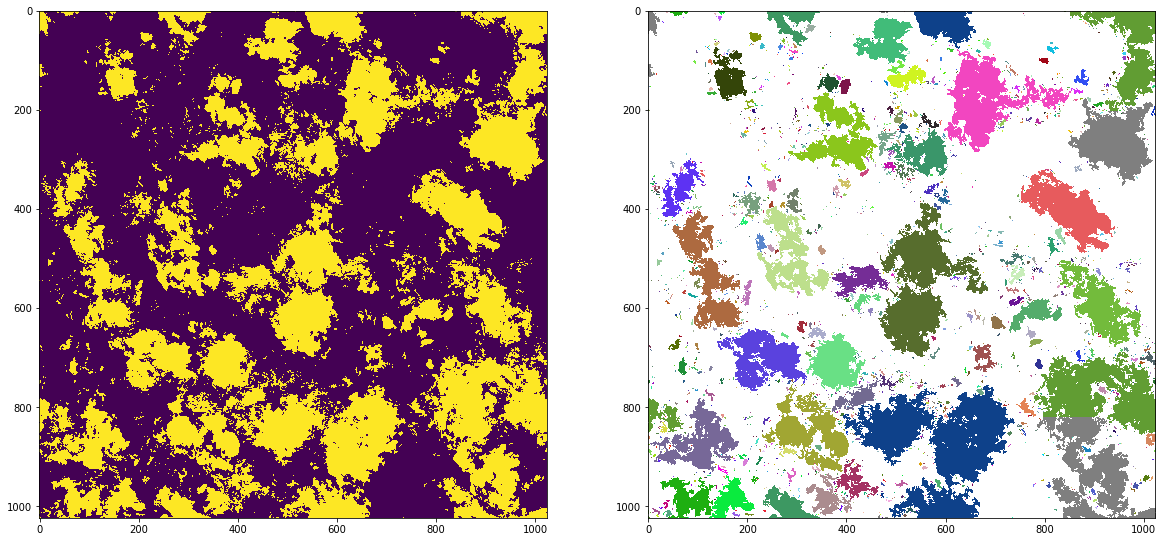

In [7]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

colors = [(0.5,0.5,0.5)] + [(random(),random(),random()) for i in range(1000)]
random_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('random_cmap', colors, N=1000)

file_ql = './ql_vertmax.nc'
data_ql = Dataset(file_ql)
timestep = 19
l2D = data_ql.variables['ql'][timestep,:,:]

l2D_bi = np.zeros_like(l2D).astype(int)

l2D_bi[l2D>1e-5]=1

labeled_clouds, A_buf, n_buffer, cloud_center, cloud_pixels = cluster_2D(l2D_bi,buffer_size=20)

masked_clouds = np.ma.masked_where(labeled_clouds<1,labeled_clouds)
fig,ax = plt.subplots(1,2,figsize=(20,10))
im1  =ax[0].imshow(l2D_bi)
#im1  =ax[1].imshow(labeled_clouds,cmap=random_cmap)
im1  =ax[1].imshow(masked_clouds,cmap=random_cmap)

print(np.max(labeled_clouds))

----------------------------------------------------
Calculate slopes from given cloud data using methods described by Newmann
-

25.0
-1.5779801747908357 -1.1888414806644507 -1.735395741340164
CPU times: user 219 ms, sys: 48.2 ms, total: 267 ms
Wall time: 193 ms


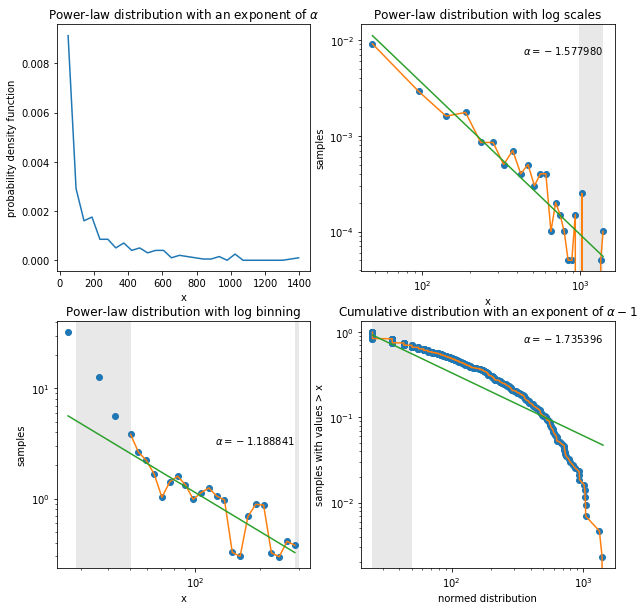

In [450]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

cloud_file = './ql_vertmax_20160610.nc'
cloud_data = Dataset(cloud_file)

#time = np.arange(len(cloud_data.variables['time'][:]))
time = 19
thresh = 1e-6
min_pixel = 4

show_plt = True
bin_n = 30
bin_min = 1
bin_max = 300

fig,m1,m2,m3 = cloud_size_dist('ql',time,bin_n,thresh,bin_min,bin_max,cloud_data,min_pixel,show_plt)
#plt.savefig("ql_vertmax_20160818_timestep_9.pdf")
print(m1,m2,m3)

----------------------------------------------------
Show variation of alpha over time, comparing clouds and plumes
-

prop_20160611_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150606_c_mask_100c_mark_200_cf2_mf1.pkl

Numbers of clouds: [0, 0, 0, 0, 0, 4, 496, 2063, 2535, 2580, 2304, 2470, 2465, 2349, 2390, 2240, 2595, 2965, 3236, 2991, 3275, 2831, 2071, 1818, 1897]
CPU times: user 12.3 s, sys: 1.99 s, total: 14.3 s
Wall time: 16.4 s


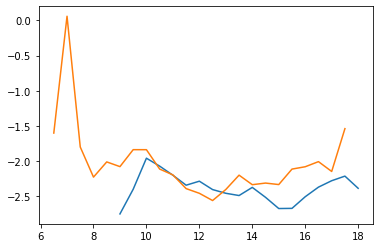

In [35]:
%%time
reload(slopes_and_binning)
reload(cloud_and_plumes_slopes)

#cloud data
cloud_file = './ql_vertmax.nc'
cloud_data = Dataset(cloud_file)
data = cloud_data.variables['ql'][:]

time = np.arange(len(cloud_data.variables['time'][:]))
plot_cloud_slope(data,time,1,1,300,100)

#plumes date
plumes_data      = './prop_20160611_c_mask_100c_mark_200_cf2_mf1.pkl'
prop_plumes      = pd.read_pickle(plumes_data)

plot_plumes_slope('sq Area','time',0,300,100,prop_plumes)

----------------------------------------------------
Creating plot_alpha() to compare different bnning methods
-

n_clouds[ 7 ]: 1
n_clouds[ 8 ]: 15
n_clouds[ 9 ]: 147
n_clouds[ 10 ]: 377
n_clouds[ 19 ]: 429
n_clouds[ 20 ]: 338
n_clouds[ 21 ]: 120
n_clouds[ 22 ]: 22
n_clouds[ 23 ]: 1
n_clouds[ 24 ]: 0
CPU times: user 1.28 s, sys: 191 ms, total: 1.47 s
Wall time: 1.51 s


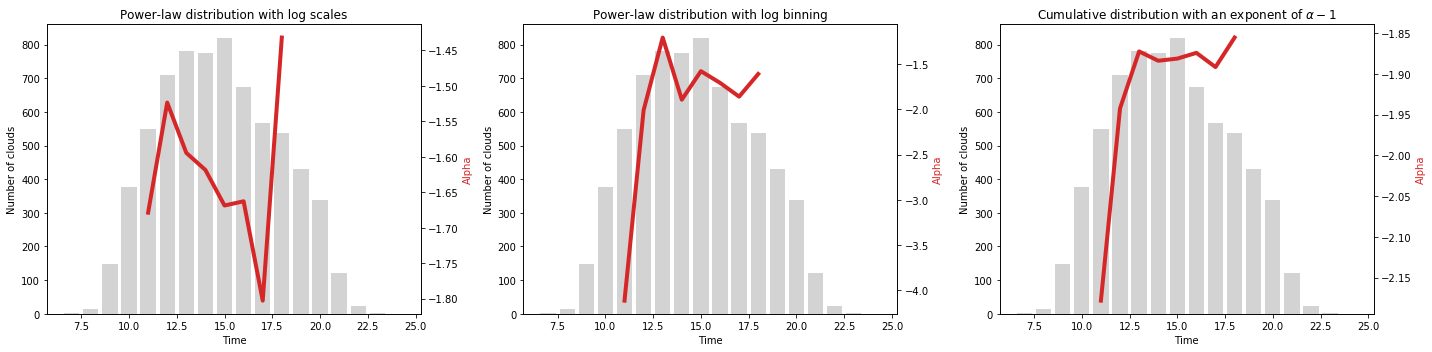

In [4]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

cloud_file = './ql_vertmax_20160610.nc'
cloud_data = Dataset(cloud_file)

thresh = 1e-6

time = np.arange(len(cloud_data.variables['time'][:]))
#time = 6

data = cloud_data.variables['ql'][time,:,:]
time, n_clouds, slope_lin, slope_log, slope_com = plot_cloud_alpha(data,time,100,thresh,1,300,min_pixel=9,n_cloud_min=500)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].bar(time, n_clouds, color='lightgrey')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Number of clouds')  # we already handled the x-label with ax1
#axes[0].text(np.max(x_bins_lin), np.max(y), r'$\alpha = %f$' % m1, horizontalalignment='right',verticalalignment='top')
axes[0].set_title('Power-law distribution with log scales')
#axes[0].axvspan(x_min_shade, x_max_shade, color='lightgray', alpha=0.5, lw=0)

axes[1].bar(time, n_clouds, color='lightgrey')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Number of clouds')
#axes[1].text(x_bins_log_mm[global_i + 1], CSD[global_i - global_j + 1], r'$\alpha = %f$' % m2, horizontalalignment='right', verticalalignment='top')
axes[1].set_title('Power-law distribution with log binning')
#axes[1].axvspan(x_min_shade1, x_max_shade1, color='lightgray', alpha=0.5, lw=0)
#axes[1].axvspan(x_min_shade2, x_max_shade2, color='lightgray', alpha=0.5, lw=0)

axes[2].bar(time, n_clouds, color='lightgrey')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Number of clouds')
#axes[2].text(np.max(dist_sort), np.max(p), r'$\alpha = %f$' % (-alpha + 1), horizontalalignment='right',verticalalignment='top')
axes[2].set_title(r'Cumulative distribution with an exponent of $\alpha-1$')
#axes[2].axvspan(x_min_shade3, x_max_shade3, color='lightgray', alpha=0.5, lw=0)

color = 'tab:red'
axes2_0 = axes[0].twinx()
axes2_1 = axes[1].twinx()
axes2_2 = axes[2].twinx()

axes2_0.plot(time, slope_lin, linewidth=4, color=color)
axes2_0.set_ylabel('Alpha', color=color)

axes2_1.plot(time, slope_log, linewidth=4, color=color)
axes2_1.set_ylabel('Alpha', color=color)

axes2_2.plot(time, slope_com, linewidth=4, color=color)
axes2_2.set_ylabel('Alpha', color=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

n_clouds[ 5 ]: 4
n_clouds[ 6 ]: 496
max var of log and com: 0.5602874800311675 
   occured at timestep: 4
min var of log and com: 0.04385456531994958 
   occured at timestep: 3
CPU times: user 742 ms, sys: 89 ms, total: 831 ms
Wall time: 774 ms


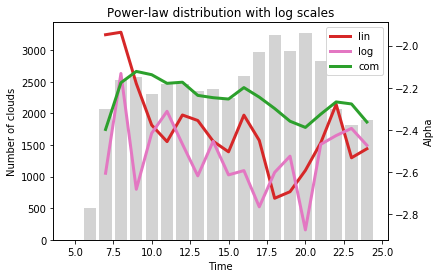

In [11]:
%%time
cloud_file = './ql_vertmax.nc'
cloud_data = Dataset(cloud_file)

thresh = 1e-6

time = np.arange(len(cloud_data.variables['time'][:]))
#time = 6
#print (time)


n_clouds = []
data = cloud_data.variables['ql'][time,:,:]
time, n_clouds, slope_lin, slope_log, slope_com = plot_cloud_alpha(data,time,100,thresh,1,300,min_pixel=9,n_cloud_min=500)

slope_var = []
t = 0
for i in range(len(slope_log)):
    if (np.isnan(slope_log[i]) or np.isnan(slope_com[i])):
        t += 1
    else:
        slope_var.append(np.absolute(slope_log[i]-slope_com[i]))
        
print ('max var of log and com:',np.max(slope_var),'\n   occured at timestep:',np.argmax(slope_var)+t)
print ('min var of log and com:',np.min(slope_var),'\n   occured at timestep:',np.argmin(slope_var)+t)

slope_com = np.asarray(slope_com)

axes = plt

axes.bar(time, n_clouds, color='lightgrey')
axes.xlabel('Time')
axes.ylabel('Number of clouds')  # we already handled the x-label with ax1
#axes[0].text(np.max(x_bins_lin), np.max(y), r'$\alpha = %f$' % m1, horizontalalignment='right',verticalalignment='top')
axes.title('Power-law distribution with log scales')
#axes[0].axvspan(x_min_shade, x_max_shade, color='lightgray', alpha=0.5, lw=0)

axes2 = axes.twinx()

axes2.set_ylabel('Alpha')
axes2.plot(time, slope_lin, linewidth=3, color='tab:red', label='lin')
axes2.plot(time, slope_log, linewidth=3, color='tab:pink', label='log')
axes2.plot(time, slope_com, linewidth=3, color='tab:green', label='com')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped

min: 0.04385456531994958 at pos 8
max: 0.5602874800311675 at pos 9


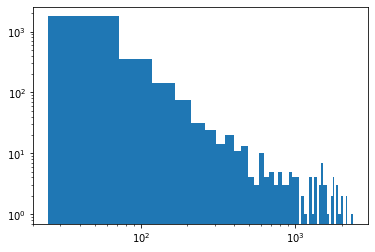

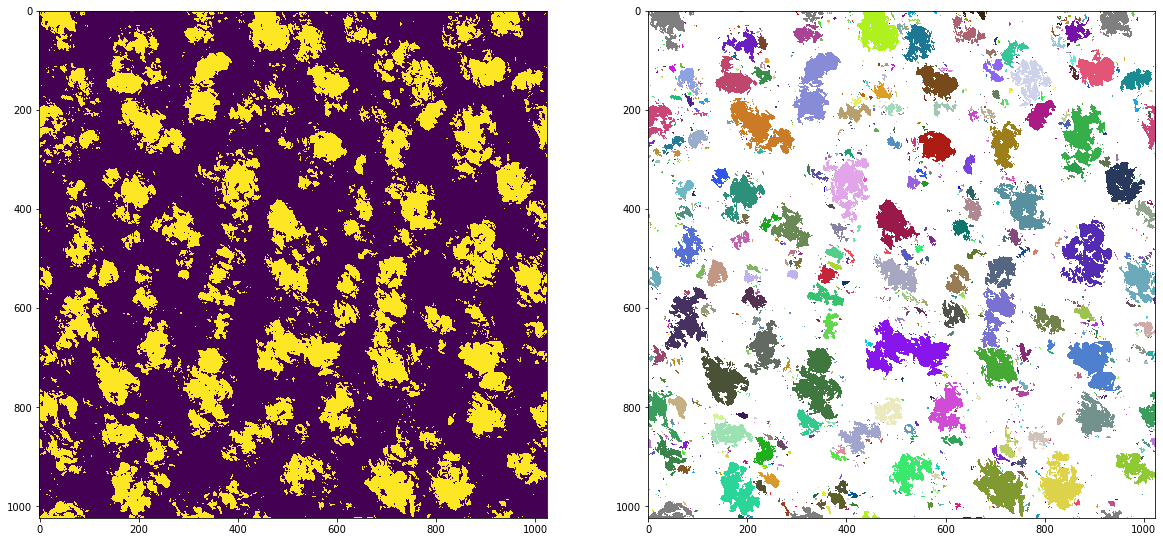

In [10]:
colors = [(0.5,0.5,0.5)] + [(random(),random(),random()) for i in range(1000)]
random_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('random_cmap', colors, N=1000)

absolute = []
j = 0
for i in range(len(slope_log)):
    if (np.isnan(slope_log[i])):
        j += 1
    else:
        absolute.append(np.abs(slope_log[i]-slope_com[i]))
print ('min:',np.min(np.abs(absolute)),'at pos',np.argmin(absolute)+len(cloud_data.variables['time'][:])-len(time)+j)
print ('max:',np.max(np.abs(absolute)),'at pos',np.argmax(absolute)+len(cloud_data.variables['time'][:])-len(time)+j)

# marks everything above ref_min as a cloud
cloud_2D_mask = np.zeros_like(cloud_data.variables['ql'][np.argmax(absolute)+len(cloud_data.variables['time'][:])-len(time)+j,:,:])
cloud_2D_mask[cloud_data.variables['ql'][np.argmax(absolute)+len(cloud_data.variables['time'][:])-len(time)+j,:,:] > thresh] = 1

# calculates how many clouds exist in cloud_2D_mask, returns total number of clouds
labeled_clouds, A_buf, n_buffer, cloud_center, cloud_pixels = cluster_2D(cloud_2D_mask,buffer_size=20)

#Grosse jeder wolken
label, cl_pixels = np.unique(labeled_clouds.ravel(),return_counts=True)
cl_size = np.sqrt(cl_pixels*25.*25.)

plt.hist(cl_size[1:],bins=50)
plt.yscale('log')
plt.xscale('log')

masked_clouds = np.ma.masked_where(labeled_clouds<1,labeled_clouds)
fig,ax = plt.subplots(1,2,figsize=(20,10))
im1  =ax[0].imshow(cloud_2D_mask)
im1  =ax[1].imshow(masked_clouds,cmap=random_cmap)

----------------------------------------------------
As plot_cloud_alpha() has only been used to calculate cloud distribution, this test ist for plumes
-
also I had to dig a bit deeper into Pandas

In [9]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

plumes_data      = './prop_20160611_c_mask_100c_mark_200_cf2_mf1.pkl'
prop_plumes      = pd.read_pickle(plumes_data)

prop_plumes.columns

CPU times: user 3.14 s, sys: 2.3 s, total: 5.45 s
Wall time: 6.18 s


Index(['Volume', 'sq Area', 'Radius', 'Area', 'height', 'V_h', 'w',
       'w profile', 'ql profile', 'qv profile', 'Area profile', 'couv profile',
       'wet h', 'wet A', 'wet V', 'wet w', 'dry h', 'dry A', 'dry V', 'dry w',
       'time', 'x', 'y', 'z', 'base', 'z max cf', 'w flux', 'qt flux',
       'qt total flux', 'qt fluc'],
      dtype='object')

In [10]:
time = np.arange(len(prop_plumes['time']))
data = prop_plumes['sq Area']

prop_plumes.describe()
#data.describe()
#data.head()


,Volume,sq Area,Radius,Area,height,V_h,w,wet h,wet A,wet V,wet w,dry h,dry A,dry V,dry w,x,y,z,base,z max cf
count,131262.000000,131262.000000,131262.000000,1.312620e+05,131262.000000,131262.000000,131262.000000,11966.000000,1.196600e+04,11966.000000,11966.000000,129818.000000,1.298180e+05,129818.000000,129818.000000,131262.000000,131262.000000,131262.000000,131262.000000,131262.000000
mean,175.155555,247.698029,139.748648,2.319318e+05,267.855510,147.333959,0.913240,259.982450,3.455182e+05,172.844601,0.365776,265.847379,2.316971e+05,171.833725,0.893009,510.604897,511.386243,19.557938,369.771526,5.259313
std,254.520434,413.011876,233.016998,8.875585e+06,281.900128,353.603363,0.714384,284.539657,4.091495e+06,202.904280,0.919196,281.383396,8.924198e+06,252.608027,0.742242,294.582662,295.110167,26.354087,626.323135,10.416976
min,78.534516,61.237244,34.549415,3.750000e+03,25.000000,27.003086,-6.004663,25.000000,6.250000e+02,25.000000,-6.429456,25.000000,6.250000e+02,25.000000,-6.100667,0.000000,0.000000,0.000000,0.000000,1.000000
25%,105.429083,139.194109,78.531866,1.937500e+04,125.000000,91.287093,0.454007,100.000000,1.125000e+04,79.370053,-0.128699,125.000000,1.875000e+04,104.004191,0.443421,258.000000,256.000000,2.000000,0.000000,2.000000
50%,135.437538,183.711731,103.648245,3.375000e+04,200.000000,115.341109,0.870492,175.000000,2.687500e+04,116.039721,0.371948,200.000000,3.312500e+04,133.420082,0.865789,510.000000,512.000000,8.000000,25.000000,2.000000
75%,186.175856,263.391344,148.602653,6.937500e+04,300.000000,154.688627,1.362391,300.000000,7.250000e+04,177.514711,0.904320,300.000000,6.812500e+04,183.894059,1.360217,765.000000,766.000000,26.000000,475.000000,2.000000
max,16112.844594,25600.000000,14443.253339,6.553600e+08,6400.000000,25566.327074,8.690995,4500.000000,1.532319e+08,3605.771750,8.690995,6400.000000,6.553600e+08,16112.844594,4.408027,1023.000000,1023.000000,213.000000,5275.000000,43.000000


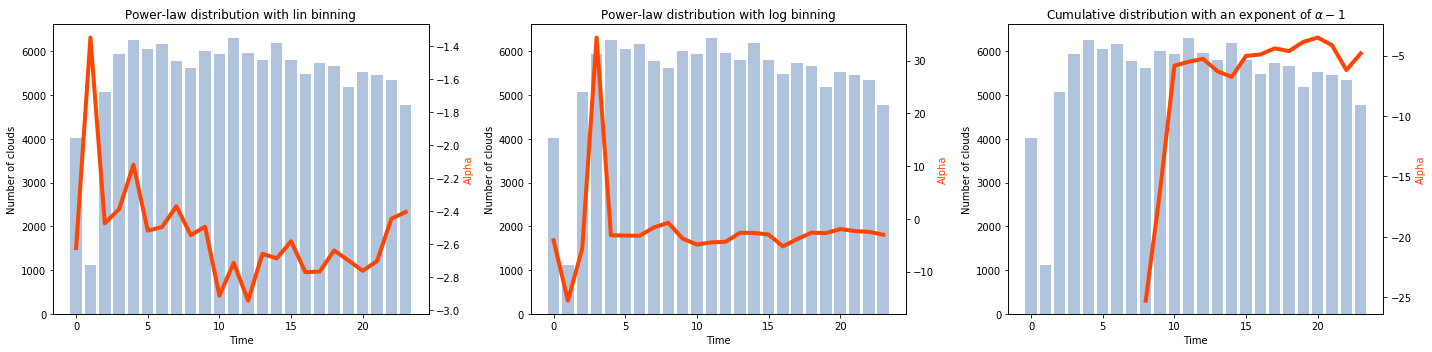

In [13]:
plumes_time_area = prop_plumes[['time','sq Area']]
#del(prop_plumes)
plumes_time_area = plumes_time_area.loc[plumes_time_area['sq Area']<25600]

time, n_plumes, slope_lin, slope_log, slope_com = plot_plume_alpha(plumes_time_area,100,1,300,min_pixel=4,n_plume_min=500)


fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].bar(time, n_plumes, color='lightsteelblue')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Number of clouds')  # we already handled the x-label with ax1
#axes[0].text(np.max(x_bins_lin), np.max(y), r'$\alpha = %f$' % m1, horizontalalignment='right',verticalalignment='top')
axes[0].set_title('Power-law distribution with lin binning')
#axes[0].axvspan(x_min_shade, x_max_shade, color='lightgray', alpha=0.5, lw=0)

axes[1].bar(time, n_plumes, color='lightsteelblue')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Number of clouds')
#axes[1].text(x_bins_log_mm[global_i + 1], CSD[global_i - global_j + 1], r'$\alpha = %f$' % m2, horizontalalignment='right', verticalalignment='top')
axes[1].set_title('Power-law distribution with log binning')
#axes[1].axvspan(x_min_shade1, x_max_shade1, color='lightgray', alpha=0.5, lw=0)
#axes[1].axvspan(x_min_shade2, x_max_shade2, color='lightgray', alpha=0.5, lw=0)

axes[2].bar(time, n_plumes, color='lightsteelblue')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Number of clouds')
#axes[2].text(np.max(dist_sort), np.max(p), r'$\alpha = %f$' % (-alpha + 1), horizontalalignment='right',verticalalignment='top')
axes[2].set_title(r'Cumulative distribution with an exponent of $\alpha-1$')
#axes[2].axvspan(x_min_shade3, x_max_shade3, color='lightgray', alpha=0.5, lw=0)

color = 'orangered'
axes2_0 = axes[0].twinx()
axes2_1 = axes[1].twinx()
axes2_2 = axes[2].twinx()

axes2_0.plot(time, slope_lin, linewidth=4, color=color)
axes2_0.set_ylabel('Alpha', color=color)

axes2_1.plot(time, slope_log, linewidth=4, color=color)
axes2_1.set_ylabel('Alpha', color=color)

axes2_2.plot(time, slope_com, linewidth=4, color=color)
axes2_2.set_ylabel('Alpha', color=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

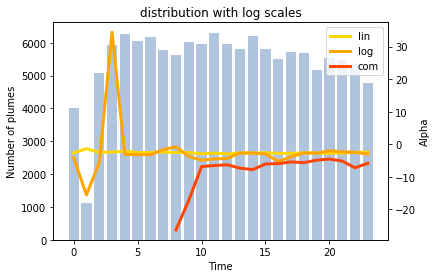

In [14]:
time, n_plumes, slope_lin, slope_log, slope_com = plot_plume_alpha(plumes_time_area,100,1,300,min_pixel=4,n_plume_min=500)

slope_com = np.asarray(slope_com)

axes = plt

axes.bar(time, n_plumes, color='lightsteelblue')
axes.xlabel('Time')
axes.ylabel('Number of plumes')  # we already handled the x-label with ax1
#axes[0].text(np.max(x_bins_lin), np.max(y), r'$\alpha = %f$' % m1, horizontalalignment='right',verticalalignment='top')
axes.title('distribution with log scales')
#axes[0].axvspan(x_min_shade, x_max_shade, color='lightgray', alpha=0.5, lw=0)

axes2 = axes.twinx()

axes2.set_ylabel('Alpha')
axes2.plot(time, slope_lin, linewidth=3, color='gold', label='lin')
axes2.plot(time, slope_log, linewidth=3, color='orange', label='log')
axes2.plot(time, slope_com-1, linewidth=3, color='orangered', label='com')

plt.legend()
#fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plume_time = np.unique(plumes_time_area['time'])
#time = np.arange(plume_time.size)/2.+6.5
#timestep = 12
#plumes_time_area_timestep = plumes_time_area.loc[plumes_time_area['time']==plume_time[timestep-1]]
#plt.hist(plumes_time_area_timestep['sq Area'],bins=100);

----------------------------------------------------
Test some new cloud data
-

----------------------------------------------------
Binning Test
-

number of Clouds: 2612 
min cloud area: 1.0 
max cloud area: 93.888231424391
bin_n_min: 25 
bin_n_max: 220
CPU times: user 2.3 s, sys: 12.4 ms, total: 2.31 s
Wall time: 2.41 s


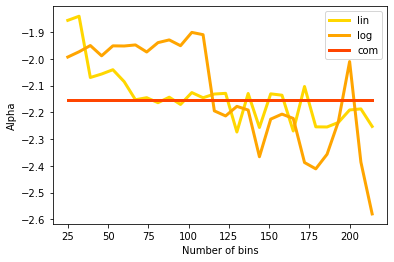

In [448]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

cloud_file = './ql_vertmax.nc'
cloud_data = Dataset(cloud_file)

#time = np.arange(len(cloud_data.variables['time'][:]))
time = 9
thresh = 1e-5

r1 = cloud_data['ql'][time]

# marks everything above ref_min as a cloud
cloud_2D_mask = np.zeros_like(r1)
cloud_2D_mask[r1 > thresh] = 1

# calculates how many clouds exist in cloud_2D_mask, returns total number of clouds
labeled_clouds, n_clouds = ndi.label(cloud_2D_mask)
labels = np.arange(1, n_clouds + 1)

# Calculating how many cells belong to each labeled cloud using ndi.labeled_comprehension
# returns cloud_area and therefore its 2D size
cloud_number_cells = ndi.labeled_comprehension(cloud_2D_mask,labeled_clouds,labels, np.size, float, 0)
cloud_area = np.sqrt(cloud_number_cells)
cloud_area_min = np.min(cloud_area)
cloud_area_max = np.max(cloud_area)
print('number of Clouds:',n_clouds,'\nmin cloud area:',np.min(cloud_area),'\nmax cloud area:',np.max(cloud_area))

bin_n_min = 25
bin_n_max = bin_n_min + int(.075*n_clouds)
bin_min = 1
bin_max = 100
print ('bin_n_min:',bin_n_min,'\nbin_n_max:',bin_n_max)
res = int((bin_n_max-bin_n_min)/25)

slope_lin = []
slope_log = []
slope_com = []
bins = []

for i in range(bin_n_min,bin_n_max,res):
    fig,m1,m2,m3 = cloud_size_dist('ql',time,i,thresh,bin_min,bin_max,cloud_data,min_pixel=4,show_plt=False)
    slope_lin.append(np.mean(m1))
    slope_log.append(np.mean(m2))
    slope_com.append(np.mean(m3))
    bins.append(i)

slope_com = np.asarray(slope_com)
slope_log = np.asarray(slope_log)
    
axes = plt

axes.xlabel('Number of bins')
axes.ylabel('Alpha')
axes.plot(bins, slope_lin, linewidth=3, color='gold', label='lin')
axes.plot(bins, slope_log, linewidth=3, color='orange', label='log')
axes.plot(bins, slope_com, linewidth=3, color='orangered', label='com')

plt.legend()


In [449]:
bins[np.argmin(slope_com-slope_log)]

102

----------------------------------------------------
The B_org
-

In [5]:
domain_size[k] = 1/10
x = 3.5
cloud_size[k] = domain_size[k] / x

var[k] = domain_size[k] / cloud_size[k]
N[k] = (domain_size[k] / cloud_size[k])**2 + var[k]

N_quer = np.mean(N)
a = const
b[k] = np.log(var[k]*cloud_size[k]/(domain_size[k]*a*N_quer))

B_org[k] = b + 1

l2D size: 1024 
l2D_buf size: 1638 
Buffer: 307 
maxl2D: 1


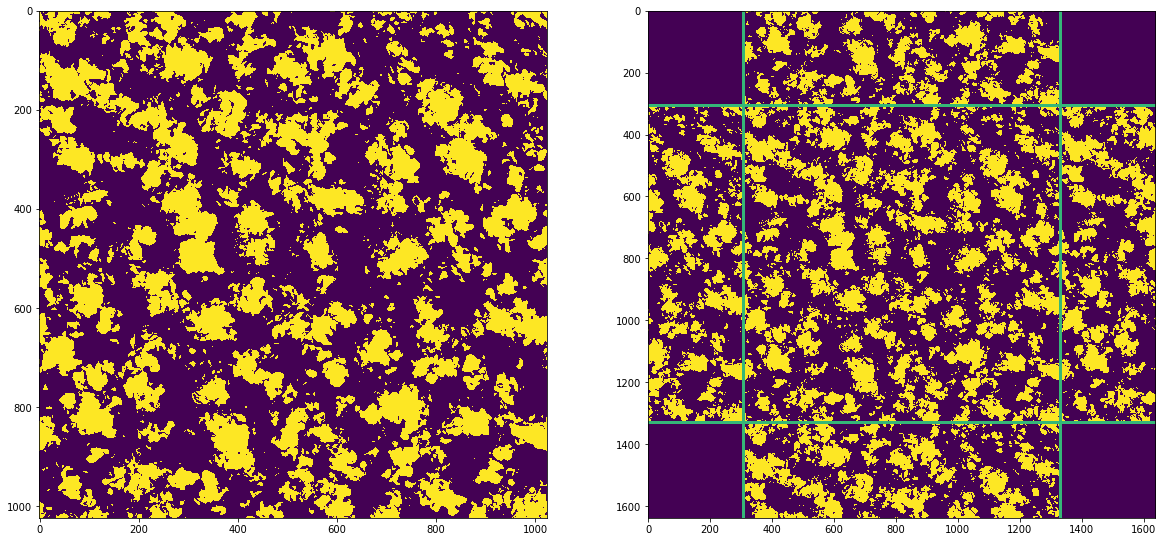

CPU times: user 1.36 s, sys: 86 ms, total: 1.45 s
Wall time: 2.08 s


In [539]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)


colors = [(0.5,0.5,0.5)] + [(random(),random(),random()) for i in range(1000)]
random_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('random_cmap', colors, N=1000)

file_ql = './ql_vertmax_20160818.nc'
data_ql = Dataset(file_ql)
timestep = 15

l2D = data_ql.variables['ql'][timestep,:,:]
l2D_bi = np.zeros_like(l2D).astype(int)
l2D_bi[l2D>1e-5]=1


labeled_clouds, l2D_bi_buf, n_buffer, cloud_center, cloud_pixels = cluster_2D(l2D_bi,buffer_size=30)

masked_clouds = np.ma.masked_where(labeled_clouds<1,labeled_clouds)


fig,ax = plt.subplots(1,2,figsize=(20,10))
im1  =ax[0].imshow(l2D_bi)
#im1  =ax[1].imshow(labeled_clouds,cmap=random_cmap)

Z1 = l2D_bi_buf*3
print ('l2D size:',len(l2D),'\nl2D_buf size:',len(l2D_bi_buf),'\nBuffer:',n_buffer,'\nmaxl2D:',np.max(l2D_bi_buf))
val = 2
Z1[0:n_buffer,0:n_buffer]=0
Z1[n_buffer+l2D_bi.shape[0]:,n_buffer+l2D_bi.shape[0]:]=0
Z1[n_buffer+l2D_bi.shape[0]:,0:n_buffer]=0
Z1[0:n_buffer,n_buffer+l2D_bi.shape[0]:]=0
Z1[n_buffer-5:n_buffer+5,:]=val
Z1[:,n_buffer-5:n_buffer+5]=val
Z1[n_buffer-5+l2D_bi.shape[0]:n_buffer+5+l2D_bi.shape[0],:]=val
Z1[:,n_buffer-5+l2D_bi.shape[0]:n_buffer+5+l2D_bi.shape[0]]=val


im1  =ax[1].imshow(Z1)
plt.show()

[[-2.2961369  -2.07909787]
 [-2.34542512 -2.40728246]]


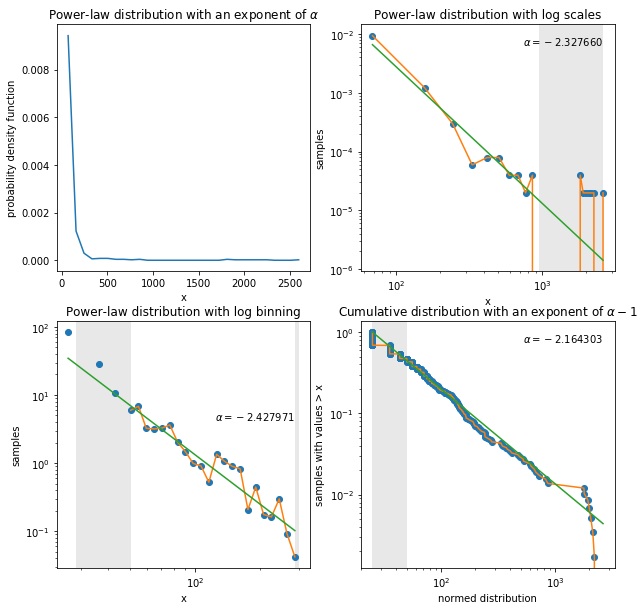

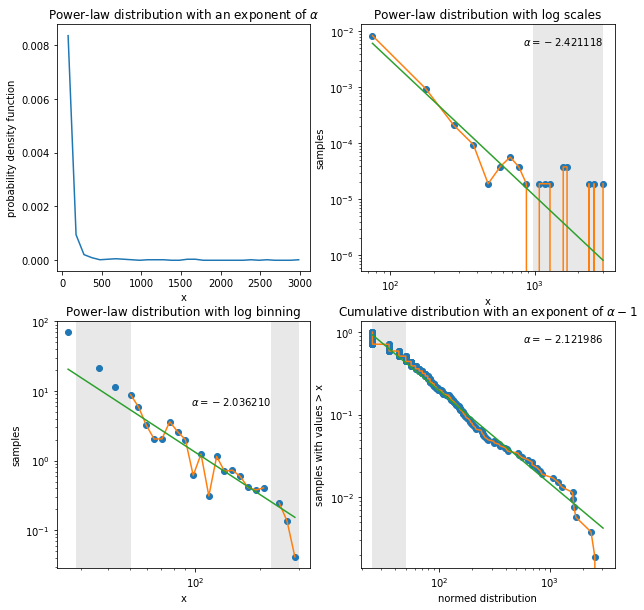

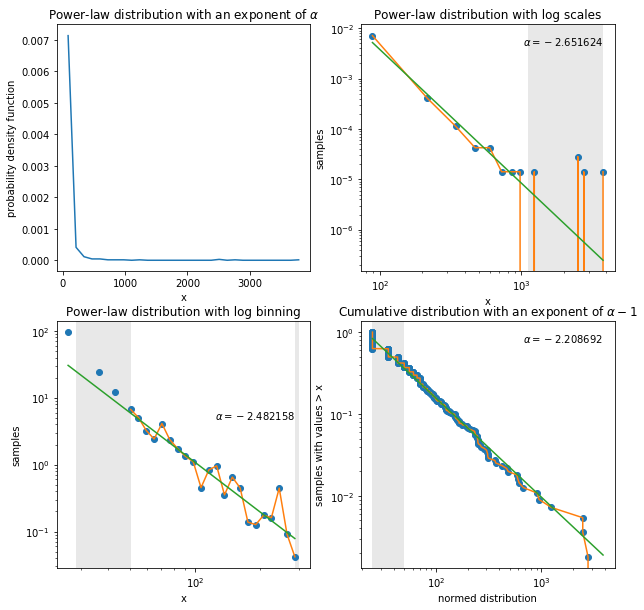

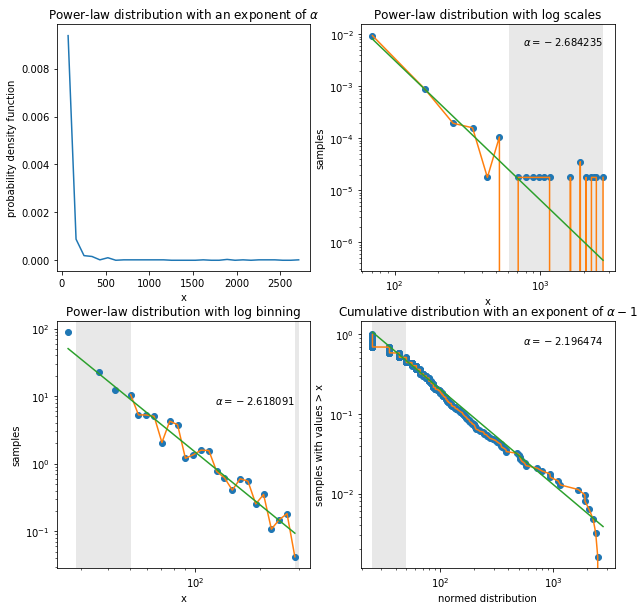

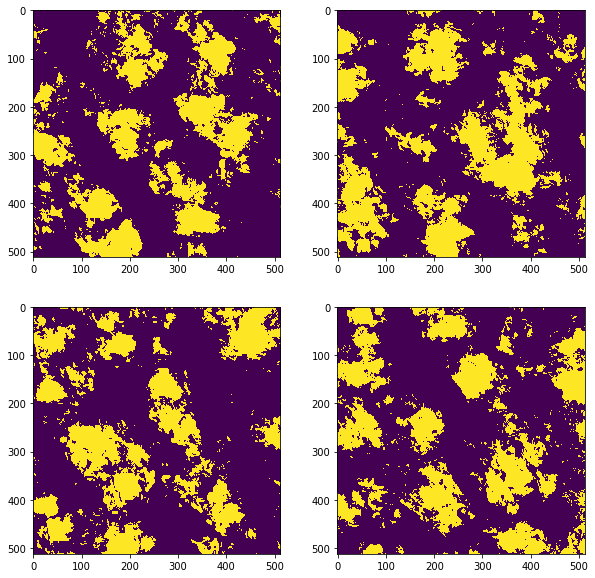

CPU times: user 8.11 s, sys: 530 ms, total: 8.64 s
Wall time: 7.81 s


In [82]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

file_ql = './ql_vertmax.nc'
data_ql = Dataset(file_ql)
timestep = 13

n_x_slices = 2
n_y_slices = 2

bin_n = 30
bin_min = 1
bin_max = 300

min_pixel = 4
show_plt = True


l2D = data_ql.variables['ql'][timestep,:,:]
l2D_bi = np.zeros_like(l2D).astype(int)
l2D_bi[l2D>1e-5]=1

labeled_clouds, l2D_bi_buf, n_buffer, cloud_center, cloud_pixels = cluster_2D(l2D_bi,buffer_size=30)

cloud_size = np.sqrt(np.asarray(cloud_pixels))*25.
cloud_center = np.asarray(cloud_center)

new_arr = np.zeros_like(l2D_bi).astype(float)
new_arr[cloud_center[:,0],cloud_center[:,1]] = cloud_size

x_split = int(l2D_bi.shape[0] / n_x_slices)
y_split = int(l2D_bi.shape[0] / n_y_slices)

#tmp_sub = np.zeros((y_split, x_split)).astype(int)

subdomain = []
subdomain_bi = []
alpha = np.zeros((n_y_slices,n_x_slices))
for y in range(n_y_slices):
    for x in range(n_x_slices):
        #print('X:',x,'\nY:',y)
        #print('x:',x*x_split,'bis',(x+1)*x_split,'\ny:',y*y_split,'bis',(y+1)*y_split)
        tmp_sub = new_arr[y*y_split:(y+1)*y_split,x*x_split:(x+1)*x_split]
        subdomain.append(tmp_sub)
        subdomain_bi.append(l2D_bi[y*y_split:(y+1)*y_split,x*x_split:(x+1)*x_split])
        
        tmp_cl_size = tmp_sub[np.nonzero(tmp_sub)]
        
        cloud_area_min = np.min(tmp_cl_size)
        cloud_area_max = np.max(tmp_cl_size)
        #print('number of Clouds:',n_clouds,'\nmin cloud area:',np.min(cloud_area),'\nmax cloud area:',np.max(cloud_area))
        fig, m1, m2, m3 = func_newmann3(tmp_cl_size, bin_n, bin_min, bin_max, cloud_area_min, cloud_area_max + 1, min_pixel, show_plt)
        alpha[y,x] = (m2 + m3)/2

print (alpha)
#subdomain = np.asarray(subdomain)
#subdomain_bi = np.zeros_like(subdomain).astype(int)
#subdomain_bi[subdomain>0] = 1

if (n_x_slices == 1 and n_y_slices == 1):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(subdomain_bi[0])
elif (n_x_slices == 1 or n_y_slices == 1):
    fig,ax = plt.subplots(n_y_slices,n_x_slices,figsize=(10,10))
    for i in range(n_x_slices*n_y_slices):
        ax[i].imshow(subdomain_bi[i])
else:
    fig,ax = plt.subplots(n_y_slices,n_x_slices,figsize=(10,10))
    for i in range(n_x_slices):
        for j in range(n_y_slices):
            ax[j,i].imshow(subdomain_bi[2*i+j])

plt.show()

In [81]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

file_ql = './ql_vertmax.nc'
data_ql = Dataset(file_ql)
timestep = 13

bin_n = 30
bin_min = 1
bin_max = 300

min_pixel = np.sqrt(4)
min_size = min_pixel*25.
show_plt = True

l2D = data_ql.variables['ql'][timestep,:,:]
l2D_bi = np.zeros_like(l2D).astype(int)
l2D_bi[l2D>1e-5]=1

labeled_clouds, l2D_bi_buf, n_buffer, cloud_center, cloud_pixels = cluster_2D(l2D_bi,buffer_size=30)

cloud_pixels = np.sqrt(np.asarray(cloud_pixels))
cloud_size = cloud_pixels*25.

x1min = np.min(cloud_size)
x2min = np.min(cloud_pixels)
x1 = cloud_size[cloud_size > x1min]
x2 = cloud_pixels[cloud_pixels > x2min]
n1 = x1.size
n2 = x2.size
alpha1 = 1. + n1 / (np.sum(np.log(x1 / min_size)))
alpha2 = 1. + n2 / (np.sum(np.log(x2 / min_pixel)))

print (alpha1,'\n',alpha2)

3.2243191734330017 
 3.2243191734330017
CPU times: user 581 ms, sys: 0 ns, total: 581 ms
Wall time: 579 ms


min cloud area: 125.0 
max cloud area: 2659.652232905648
Number of Subdomains: 8
Number of Subdomains: 40
Number of Subdomains: 176
Number of Subdomains: 736
Number of Subdomains: 3008


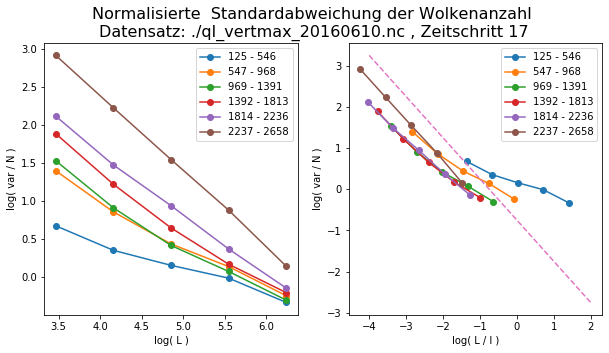

CPU times: user 1.67 s, sys: 15.8 ms, total: 1.68 s
Wall time: 1.68 s


In [20]:
%%time
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)

file_ql = './ql_vertmax_20160610.nc'
data_ql = Dataset(file_ql)
timestep = 17

subdomains = [2,4,8,16,32]

n_bins = 6
log_binning = False
inbetween_subs = True

min_pixel = 25

l2D = data_ql.variables['ql'][timestep,:,:]
l2D_bi = np.zeros_like(l2D).astype(int)
l2D_bi[l2D>1e-6]=1

labeled_clouds, l2D_bi_buf, n_buffer, cloud_center, cloud_pixels = cluster_2D(l2D_bi,buffer_size=30)

cloud_size = np.sqrt(np.asarray(cloud_pixels))*25.
cloud_center = np.asarray(cloud_center)

new_arr = np.zeros_like(l2D_bi).astype(float)
new_arr[cloud_center[:,0],cloud_center[:,1]] = cloud_size

the_var = []
the_N =  []
L = []

cloud_area_min = np.sqrt(min_pixel)*25.
cloud_area_max = np.max(cloud_size)
print ('min cloud area:',cloud_area_min,'\nmax cloud area:',cloud_area_max)

for n_x_slices in subdomains:
    n_y_slices = n_x_slices
    x_split = int(l2D_bi.shape[0] / n_x_slices)
    y_split = int(l2D_bi.shape[0] / n_y_slices)
    
    dist = []
    var = []
    N = []
    L.append(len(new_arr)/n_x_slices)
    n_sub = 0
    for y in range(n_y_slices):
        for x in range(n_x_slices):
            n_sub += 1
            tmp_sub = new_arr[y*y_split:(y+1)*y_split,x*x_split:(x+1)*x_split]
            tmp_cl_size = tmp_sub[tmp_sub>np.sqrt(min_pixel)*25.]
            if (log_binning):
                n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=np.logspace(np.log10(cloud_area_min),np.log10(cloud_area_max), n_bins+1),range=(cloud_area_min, cloud_area_max))
            else:
                n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=n_bins,range=(cloud_area_min, cloud_area_max))
            dist.append(n_cl_per_bin)
            
    if inbetween_subs:
                for y in range(n_y_slices):
                    for x in range(n_x_slices-1):
                        n_sub += 1
                        tmp_sub = new_arr[y*y_split:(y+1)*y_split,int((x+.5)*x_split):int((x+1.5)*x_split)]
                        tmp_cl_size = tmp_sub[tmp_sub>np.sqrt(min_pixel)*25.]
                        if log_binning:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=np.logspace(np.log10(cloud_area_min),np.log10(cloud_area_max), n_bins+1),range=(cloud_area_min, cloud_area_max))
                        else:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=n_bins,range=(cloud_area_min, cloud_area_max))
                        dist.append(n_cl_per_bin)

                for y in range(n_y_slices-1):
                    for x in range(n_x_slices):
                        n_sub += 1
                        tmp_sub = new_arr[int((y+.5)*y_split):int((y+1.5)*y_split),x*x_split:(x+1)*x_split]
                        tmp_cl_size = tmp_sub[tmp_sub>np.sqrt(min_pixel)*25.]
                        if log_binning:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=np.logspace(np.log10(cloud_area_min),np.log10(cloud_area_max), n_bins+1),range=(cloud_area_min, cloud_area_max))
                        else:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=n_bins,range=(cloud_area_min, cloud_area_max))
                        dist.append(n_cl_per_bin)

            
    print('Number of Subdomains:',n_sub)
    dist = np.asarray(dist)
    for i in range(n_bins):
        N.append(np.sum(dist[:,i])/(n_x_slices*n_y_slices))
        var.append(np.sqrt(np.sum((dist[:,i]-N[i])**2)/(n_x_slices*n_y_slices)))

    the_var.append(var)
    the_N.append(N)
    
the_N = np.asarray(the_N)
the_var = np.asarray(the_var)

fig,ax = plt.subplots(1,2,figsize=(10,5))
y_axis = np.log(the_var/the_N)

slope = []
intercept = []
for i in range(n_bins):
    x_axis = np.log(L/l[i])
    
    im1 = ax[0].plot(np.log(L),y_axis[:,i], '-o', label='%i - %i'%(int(l[i]),int(l[i+1])-1))
    im2 = ax[1].plot(x_axis,y_axis[:,i], '-o', label='%i - %i'%(int(l[i]),int(l[i+1])-1))
    
im1 = ax[1].plot([-4,2],np.polyval([-1,-.75],[-4,2]),'--')

fig.suptitle('Normalisierte  Standardabweichung der Wolkenanzahl \nDatensatz: %s , Zeitschritt %i' % (file_ql,timestep), fontsize=16)

ax[0].legend(loc='best')
ax[0].set_xlabel('log( L )')
ax[0].set_ylabel('log( var / N )')

ax[1].legend(loc='best')
ax[1].set_xlabel('log( L / l )')
ax[1].set_ylabel('log( var / N )')

plt.show()

timestep 0 is invalid.
timestep 1 is invalid.
timestep 2 is invalid.
timestep 3 is invalid.
timestep 4 is invalid.
timestep 5 is invalid.


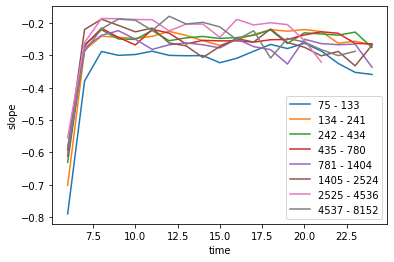

In [25]:
import warnings
warnings.filterwarnings("ignore")

subdomains = [2,4,8,16,32]

n_bins = 8

log_binning = True
inbetween_subs = True

min_pixel = 9

time_len = len(cloud_data.variables['ql'][:,0,0])
f = np.zeros((n_bins,2,time_len))

for timestep in range(time_len):

    l2D = cloud_data.variables['ql'][timestep,:,:]
    l2D_bi = np.zeros_like(l2D).astype(int)
    l2D_bi[l2D>1e-6]=1
    
    if (len(l2D_bi[l2D_bi==1])>25):
        labeled_clouds, l2D_bi_buf, n_buffer, cloud_center, cloud_pixels = cluster_2D(l2D_bi,buffer_size=50)

        cloud_size = np.sqrt(np.asarray(cloud_pixels))*25.
        cloud_center = np.asarray(cloud_center)

        new_arr = np.zeros_like(l2D_bi).astype(float)
        new_arr[cloud_center[:,0],cloud_center[:,1]] = cloud_size

        cloud_area_min = np.sqrt(min_pixel)*25.
        cloud_area_max = np.max(cloud_size)
        #print ('min cloud area:',cloud_area_min,'\nmax cloud area:',cloud_area_max)

        for n_x_slices in subdomains:
            n_y_slices = n_x_slices
            x_split = int(l2D_bi.shape[0] / n_x_slices)
            y_split = int(l2D_bi.shape[0] / n_y_slices)

            the_var = []
            the_N =  []
            L = []

            dist = []
            var = []
            N = []

            L.append(len(new_arr)/n_x_slices)
            n_sub = 0
            for y in range(n_y_slices):
                for x in range(n_x_slices):
                    n_sub += 1
                    tmp_sub = new_arr[y*y_split:(y+1)*y_split,x*x_split:(x+1)*x_split]
                    tmp_cl_size = tmp_sub[tmp_sub>np.sqrt(min_pixel)*25.]
                    if log_binning:
                        n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=np.logspace(np.log10(cloud_area_min),np.log10(cloud_area_max), n_bins+1),range=(cloud_area_min, cloud_area_max))
                    else:
                        n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=n_bins,range=(cloud_area_min, cloud_area_max))
                    dist.append(n_cl_per_bin)
            if inbetween_subs:
                for y in range(n_y_slices):
                    for x in range(n_x_slices-1):
                        n_sub += 1
                        tmp_sub = new_arr[y*y_split:(y+1)*y_split,int((x+.5)*x_split):int((x+1.5)*x_split)]
                        tmp_cl_size = tmp_sub[tmp_sub>np.sqrt(min_pixel)*25.]
                        if log_binning:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=np.logspace(np.log10(cloud_area_min),np.log10(cloud_area_max), n_bins+1),range=(cloud_area_min, cloud_area_max))
                        else:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=n_bins,range=(cloud_area_min, cloud_area_max))
                        dist.append(n_cl_per_bin)

                for y in range(n_y_slices-1):
                    for x in range(n_x_slices):
                        n_sub += 1
                        tmp_sub = new_arr[int((y+.5)*y_split):int((y+1.5)*y_split),x*x_split:(x+1)*x_split]
                        tmp_cl_size = tmp_sub[tmp_sub>np.sqrt(min_pixel)*25.]
                        if log_binning:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=np.logspace(np.log10(cloud_area_min),np.log10(cloud_area_max), n_bins+1),range=(cloud_area_min, cloud_area_max))
                        else:
                            n_cl_per_bin, l = np.histogram(tmp_cl_size, bins=n_bins,range=(cloud_area_min, cloud_area_max))
                        dist.append(n_cl_per_bin)

            dist = np.asarray(dist)
            for i in range(n_bins):
                N.append(np.sum(dist[:,i])/(n_x_slices*n_y_slices))
                var.append(np.sqrt(np.sum((dist[:,i]-N[i])**2)/(n_x_slices*n_y_slices)))

            the_var.append(var)
            the_N.append(N)

        the_N = np.asarray(the_N)
        the_var = np.asarray(the_var)
        
        y_axis = np.log(the_var/the_N)
        slope = []
        intercept = []
        for i in range(n_bins):
            x_axis = np.log(L/l[i])
            m, b = np.polyfit(x_axis, y_axis[:,i], 1)
            slope.append(m)
            intercept.append(b)
        
        f[:,0,timestep] = slope
        f[:,1,timestep] = intercept
    else:
        f[:,:,timestep] = np.nan
        print('timestep',timestep,'is invalid.')

for i in range(len(f[:,0,0])):
    plt.plot(f[i,0,:],'-',label='%i - %i'%(int(l[i]),int(l[i+1])-1))
    
plt.legend()
plt.xlabel('time')
plt.ylabel('slope')
plt.show()